In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    

In [3]:
data = pd.read_excel("Transformed_data/transformed_data_1.xlsx")

In [4]:
X=data.drop('SeriousDlqin2yrs',axis=1).values
y=data['SeriousDlqin2yrs'].values
#y=y.reshape(-1,1)
print(X.shape)
print(y.shape)

(148800, 10)
(148800,)


{'reg__C': 0.001}
0.686727501806
             precision    recall  f1-score   support

          0       0.93      1.00      0.97     41657
          1       0.50      0.01      0.03      2983

avg / total       0.90      0.93      0.90     44640

[[41616    41]
 [ 2942    41]]


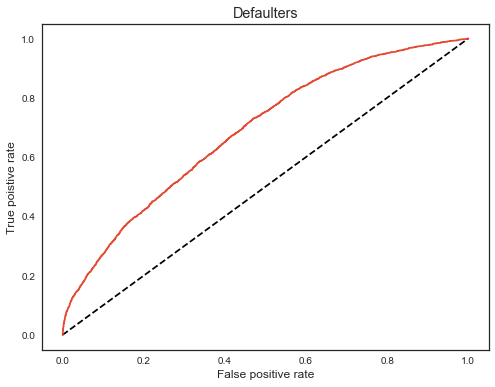

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
steps = [('scaler',StandardScaler()),
         ('reg',LogisticRegression(penalty='l1', random_state=777, max_iter=10000, tol=10))]
pipeline = Pipeline(steps)
parameters = {'reg__C': np.power(10.0, np.arange(-10, 10))}
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)
cv= GridSearchCV(pipeline,param_grid=parameters,scoring='roc_auc', cv=10)
cv.fit(X_train,y_train)
y_pred= cv.predict(X_test)
print(cv.best_params_)
print(cv.score(X_test,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
y_pred_prob=cv.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True poistive rate')
plt.title('Defaulters')
plt.show()

In [6]:
#for LOG reg with l1 regulrization
from sklearn.metrics import roc_auc_score
y_pred_prob = cv.predict_proba(X_test)[:,1]
logr1=roc_auc_score(y_test,y_pred_prob)
print(logr1)

0.686727501806


{'reg__C': 1e-10}
0.714930287561
             precision    recall  f1-score   support

          0       0.93      1.00      0.97     41657
          1       0.50      0.01      0.03      2983

avg / total       0.90      0.93      0.90     44640

[[41616    41]
 [ 2942    41]]


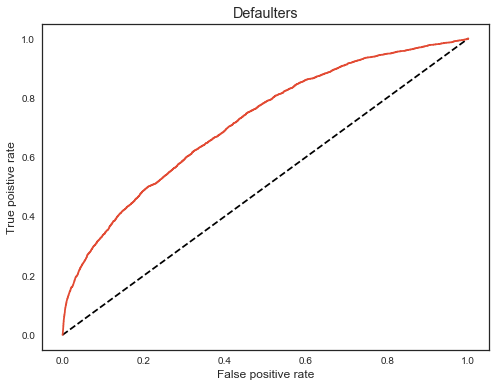

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

steps = [('scaler',StandardScaler()),
         ('reg',LogisticRegression(penalty='l2', random_state=777, max_iter=100000))]
pipeline = Pipeline(steps)
parameters = {'reg__C': np.power(10.0, np.arange(-10, 10))}
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)
cv= GridSearchCV(pipeline,param_grid=parameters,scoring='roc_auc', cv=10)
cv.fit(X_train,y_train)
y_pred= cv.predict(X_test)
print(cv.best_params_)
print(cv.score(X_test,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#y_pred_prob= pipeline.named_steps['reg'].predict_proba(X_test)[:,1]
y_pred_prob=cv.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True poistive rate')
plt.title('Defaulters')
plt.show()

In [23]:
#for LOG reg with l2 regularization
from sklearn.metrics import roc_auc_score
y_pred_prob = cv.predict_proba(X_test)[:,1]
logr2=roc_auc_score(y_test,y_pred_prob)
print(logr2)

0.714930287561


In [24]:
for i in range(10):
    print(cv.predict_proba(X_test)[0,:])

[ 0.50000103  0.49999897]
[ 0.50000103  0.49999897]
[ 0.50000103  0.49999897]
[ 0.50000103  0.49999897]
[ 0.50000103  0.49999897]
[ 0.50000103  0.49999897]
[ 0.50000103  0.49999897]
[ 0.50000103  0.49999897]
[ 0.50000103  0.49999897]
[ 0.50000103  0.49999897]


In [25]:
from sklearn.grid_search import GridSearchCV
 
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt', oob_score = True) 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [3,4,5,6],
           "max_depth" : [5, 10, 15, 20],
           "min_samples_leaf" : [1000,2000,3000]}
 
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1000, 'n_estimators': 3}


{'max_depth': 10, 'min_samples_leaf': 1000, 'n_estimators': 3}
0.934453405018
             precision    recall  f1-score   support

          0       0.94      1.00      0.97     41657
          1       0.65      0.04      0.08      2983

avg / total       0.92      0.93      0.91     44640

[[41591    66]
 [ 2860   123]]


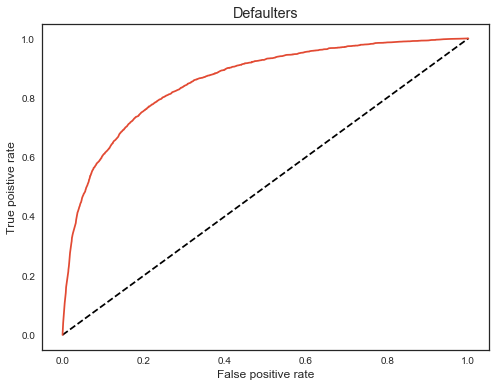

In [26]:
 y_pred= CV_rfc.predict(X_test)
print(CV_rfc.best_params_)
print(CV_rfc.score(X_test,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#y_pred_prob= pipeline.named_steps['reg'].predict_proba(X_test)[:,1]
y_pred_prob=CV_rfc.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForest')
plt.xlabel('False positive rate')
plt.ylabel('True poistive rate')
plt.title('Defaulters')
plt.show()

In [27]:
#for RandomForest
from sklearn.metrics import roc_auc_score
y_pred_prob = CV_rfc.predict_proba(X_test)[:,1]
rf=roc_auc_score(y_test,y_pred_prob)
print(rf)

0.857003141189


0.936760752688
             precision    recall  f1-score   support

          0       0.95      0.99      0.97     41742
          1       0.54      0.19      0.29      2898

avg / total       0.92      0.94      0.92     44640

[[41254   488]
 [ 2335   563]]


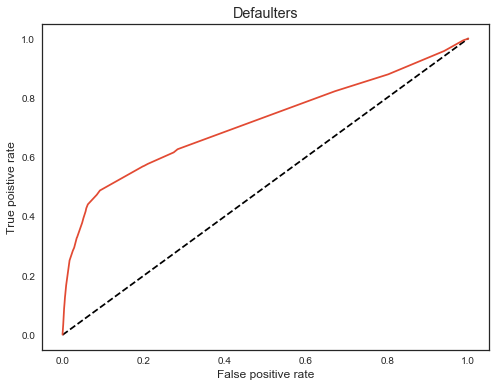

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

clf = BernoulliNB(binarize=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)
clf.fit(X_train,y_train)
predicted= clf.predict(X_test)
print(clf.score(X_test,y_test))
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))
y_pred_prob=clf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='BernoulliNB')
plt.xlabel('False positive rate')
plt.ylabel('True poistive rate')
plt.title('Defaulters')
plt.show()

In [29]:
#for BernoulliNB with binarizer
from sklearn.metrics import roc_auc_score
y_pred_prob = clf.predict_proba(X_test)[:,1]
bnb=roc_auc_score(y_test,y_pred_prob)
print(bnb)

0.716120723711


0.934475806452
             precision    recall  f1-score   support

          0       0.94      1.00      0.97     41742
          1       0.43      0.03      0.05      2898

avg / total       0.90      0.93      0.91     44640

[[41636   106]
 [ 2819    79]]


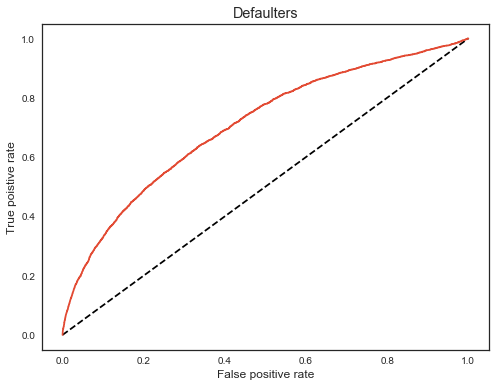

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

clf = GaussianNB()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)
clf.fit(X_train,y_train)
predicted= clf.predict(X_test)
print(clf.score(X_test,y_test))
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))
y_pred_prob=clf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('False positive rate')
plt.ylabel('True poistive rate')
plt.title('Defaulters')
plt.show()

In [31]:
#for gaussianNB
from sklearn.metrics import roc_auc_score
y_pred_prob = clf.predict_proba(X_test)[:,1]
gnb=roc_auc_score(y_test,y_pred_prob)
print(gnb)

0.70574074537


0.935237455197
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     41742
          1       0.51      0.10      0.17      2898

avg / total       0.91      0.94      0.91     44640

[[41448   294]
 [ 2597   301]]


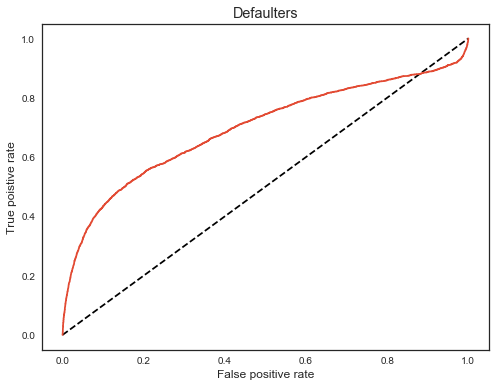

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
#from sklearn.neural_network import MLPClassifier
#clf = QuadraticDiscriminantAnalysis()
clf = LinearDiscriminantAnalysis()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)
clf.fit(X_train,y_train)
predicted= clf.predict(X_test)
print(clf.score(X_test,y_test))
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))
y_pred_prob=clf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Linear DA')
plt.xlabel('False positive rate')
plt.ylabel('True poistive rate')
plt.title('Defaulters')
plt.show()

In [33]:
#for LDA
from sklearn.metrics import roc_auc_score
y_pred_prob = clf.predict_proba(X_test)[:,1]
lda=roc_auc_score(y_test,y_pred_prob)
print(lda)

0.695359741967


0.923812724014
             precision    recall  f1-score   support

          0       0.95      0.97      0.96     41742
          1       0.39      0.31      0.35      2898

avg / total       0.92      0.92      0.92     44640

[[40337  1405]
 [ 1996   902]]


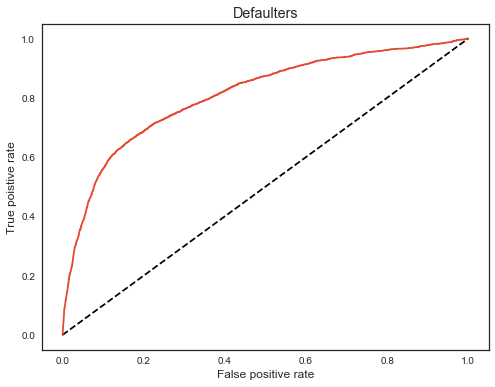

In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
clf = QuadraticDiscriminantAnalysis()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)
clf.fit(X_train,y_train)
predicted= clf.predict(X_test)
print(clf.score(X_test,y_test))
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))
y_pred_prob=clf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Quadratic DA')
plt.xlabel('False positive rate')
plt.ylabel('True poistive rate')
plt.title('Defaulters')
plt.show()

In [35]:
#for QDA
from sklearn.metrics import roc_auc_score
y_pred_prob = clf.predict_proba(X_test)[:,1]
qda=roc_auc_score(y_test,y_pred_prob)
print(qda)

0.809606967663


0.935080645161
             precision    recall  f1-score   support

          0       0.94      1.00      0.97     41742
          1       0.00      0.00      0.00      2898

avg / total       0.87      0.94      0.90     44640

[[41742     0]
 [ 2898     0]]


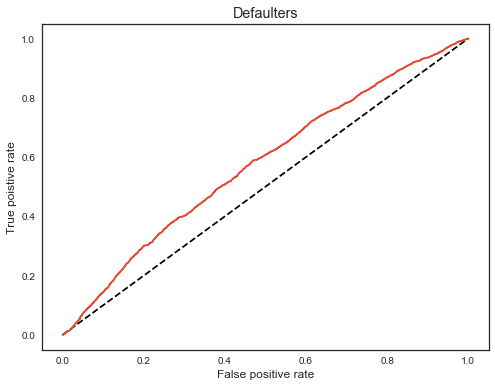

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(51, 11), random_state=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)
clf.fit(X_train,y_train)
predicted= clf.predict(X_test)
print(clf.score(X_test,y_test))
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))
y_pred_prob=clf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='MLP')
plt.xlabel('False positive rate')
plt.ylabel('True poistive rate')
plt.title('Defaulters')
plt.show()

In [37]:
#for MLP
from sklearn.metrics import roc_auc_score
y_pred_prob = clf.predict_proba(X_test)[:,1]
mlp=roc_auc_score(y_test,y_pred_prob)
print(mlp)

0.575947109985


In [38]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
predicted= clf.predict(X_test)
print(clf.score(X_test,y_test))
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))

0.933355734767
             precision    recall  f1-score   support

          0       0.94      1.00      0.97     41742
          1       0.31      0.02      0.04      2898

avg / total       0.90      0.93      0.91     44640

[[41603   139]
 [ 2836    62]]


In [39]:
#for KNN
from sklearn.metrics import roc_auc_score
y_pred_prob = clf.predict_proba(X_test)[:,1]
knn=roc_auc_score(y_test,y_pred_prob)
print(knn)

0.566894834677


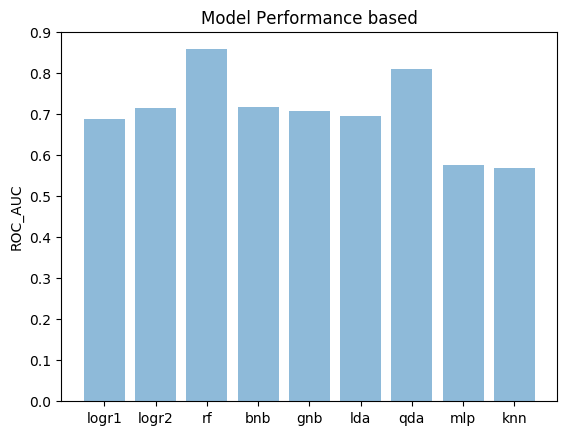

In [40]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('logr1', 'logr2', 'rf', 'bnb', 'gnb', 'lda','qda','mlp','knn')
y_pos = np.arange(len(objects))
performance = [logr1,logr2,rf,bnb,gnb,lda,qda,mlp,knn]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('ROC_AUC')
plt.title('Model Performance based')
 
plt.show()